In [1]:
from __future__ import print_function
import json
import matplotlib
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
json_data=open('../json.data/contest_v1.json')
data = json.load(json_data)
json_data.close()

json_rank=open('../json.data/ranklist.json')
rank = json.load(json_rank)
json_rank.close()

json_op=open('../json.data/contest_out_operators.json')
op = json.load(json_op)
json_op.close()

json_dt=open('../json.data/contest_out_datatypes.json')
dt = json.load(json_dt)
json_dt.close()

In [3]:
len(data)

8048

In [4]:
data[0]

{'filename': '1542501099.cpp',
 'nloc': 28,
 'token_count': 285,
 'problem': 'https://www.codeforces.com/contest/868/problem/B',
 'solution': 'https://www.codeforces.com/contest/868/submission/45891140',
 'exec_time': '31 ms',
 'memory': '300 KB',
 'usertype': 'Candidate',
 'function_count': 1,
 'library_count': 1,
 'used_headers': 1,
 'macro_count': 10,
 'used_macros': 5,
 'function_details': [{'cyclomatic_complexity': 18,
   'nloc': 18,
   'token_count': 222,
   'name': 'main',
   'long_name': 'main()',
   'start_line': 33,
   'end_line': 67,
   'parameters': [],
   'filename': '1542501099.cpp',
   'top_nesting_level': 0,
   'length': 35,
   'fan_in': 0,
   'fan_out': 0,
   'general_fan_out': 0}]}

In [5]:
print(type(rank),type(op), type(dt))
print(op[0])
print(dt[0])

<class 'dict'> <class 'list'> <class 'list'>
{'filename': '1542501099.cpp', 'operators': 10, 'boolean_operators': 10, 'binary_operators': 0}
{'filename': '1542501099.cpp', 'unsigned ll': 0, 'unisgned int': 0, 'unsigned long': 0, 'long long': 1, 'long': 0, 'int': 4, 'long double': 0, 'double': 0, 'float': 0, 'char': 0, 'string': 0, 'scanf': 0, 'printf': 0, 'cin': 2, 'cout': 1, '#define': 2, 'typedef': 8, '#pragma': 0, 'fast_io': 0}


In [6]:
set1 = set([])
data_uniq = []
for x in data:
    if x['solution'] not in set1:
        set1.add(x['solution'])
        data_uniq.append(x)
data = data_uniq[:]
print(len(data))

7943


In [7]:
#Check for order of files in data and op are same or not
for i in range(len(data)):
    if not data[i]['filename']==op[i]['filename']:
        print(i,data[i]['filename'], op[i]['filename'])
        print('No')
        break

2 1542501110.cpp 1542501106.cpp
No


In [8]:
i = 0
file_order_op = {}
for x in op:
    file_order_op[x['filename']] = i
    i += 1
    
i = 0
file_order_dt = {}
for x in dt:
    file_order_dt[x['filename']] = i
    i += 1

In [9]:
op[file_order_op['1542501099.cpp']]['operators']

10

In [10]:
dt[file_order_dt['1542501099.cpp']]['int']

4

In [11]:
tph = []
prob_cat = ['A','B']
main_cat = ['Expert','Master','Newbie','Pupil','Specialist','Unrated,','Candidate','International']
fin_list_AB = []
prob_AB = {}
count_AB = 0
for x in data:
    if x['problem'][-1] in prob_cat:
        if x['token_count'] > 0 and x['usertype'] in main_cat:
            json_tmp=open('../contest/'+x['filename'].split('.')[0]+'.json')
            tmp = json.load(json_tmp)
            try:
                tph.append(rank[tmp['username']])
                try:
                    prob_AB[tmp['username']].append(x['filename'])
                except:
                    prob_AB[tmp['username']] = [x['filename']]
            except:
                pass
            json_tmp.close()
for x,w in prob_AB.items():
    if len(w)>2:
        print(x,w)
    if len(w)==2:
        count_AB += 1
print(count_AB)
print(prob_AB['Akikaze'])

dodo_xxy ['1542532400.cpp', '1542532404.cpp', '1542581045.cpp']
henuwhr ['1542533587.cpp', '1542574089.cpp', '1542574117.cpp', '1542579743.cpp']
claudy ['1542533599.cpp', '1542578518.cpp', '1542593624.cpp']
kakakaka ['1542535177.cpp', '1542535184.cpp', '1542575878.cpp', '1542588646.cpp']
hyesuixin ['1542535511.cpp', '1542579113.cpp', '1542585633.cpp']
LSC333 ['1542535730.cpp', '1542583158.cpp', '1542588673.cpp']
kailashnath1998 ['1542537230.cpp', '1542537236.cpp', '1542577904.cpp', '1542589891.cpp']
WHzy ['1542550700.cpp', '1542550706.cpp', '1542550722.cpp', '1542588424.cpp']
Mr_Illuminati ['1542557348.cpp', '1542557352.cpp', '1542583055.cpp']
AAWisong ['1542558228.cpp', '1542587059.cpp', '1542589881.cpp']
Noam527 ['1542558232.cpp', '1542585330.cpp', '1542594077.cpp']
terminal ['1542559240.cpp', '1542559264.cpp', '1542582820.cpp']
dorijanlendvaj ['1542559313.cpp', '1542561560.cpp', '1542587687.cpp', '1542594442.cpp']
nikitawani ['1542559339.cpp', '1542561362.cpp', '1542579304.cpp']
Aam

In [12]:
up_1 = 0
up_2 = 0
down_1 = 0
down_2 = 0
function_count = []
nloc = []
token_count = []
library_count = []
used_library = []
used_library_per = []
macro_count = []
used_macro = []
used_macro_per = []
usertype = []
mat_op = []
logical_op = []
bit_op = []
pragma = []
fastio = []
dt_order = ['unsigned ll', 'unisgned int', 'unsigned long', 'long long', 'long', 'int', 'long double', 'double', 'float', 'char', 'string']
dt_count_1 = [[] for i in range(len(dt_order))]
dt_count_2 = [[] for i in range(len(dt_order))]
# print(dt_count_1)
main_div1 = ['Expert','Master','Candidate','International']
main_div2 = ['Newbie','Pupil','Specialist']
prob_A = 0
prob_B = 0
count_AB = 0
user_rank = []
userdiv = []
time_A = []
time_B = []
cio = []
scpr = []
mp = 0
for x in data:
    if x['problem'][-1] in prob_cat:
        if x['token_count'] > 0 and x['usertype'] in main_cat:
            json_tmp=open('../contest/'+x['filename'].split('.')[0]+'.json')
            tmp = json.load(json_tmp)
            try:
                if len(prob_AB[tmp['username']])==2:
                    if rank[tmp['username']][1]==-1 or rank[tmp['username']][2]==-1:
                        mp+=1
                        continue
                    user_rank.append(rank[tmp['username']][0])
                    tA = rank[tmp['username']][1].split(':')
                    tA = int(tA[0])*60 + int(tA[1])
                    time_A.append(tA)
                    tB = rank[tmp['username']][2].split(':')
                    tB = int(tB[0])*60 + int(tB[1])
                    time_B.append(tB)
                    if int(user_rank[-1])<=200:
                        userdiv.append('Upper')
                        if (x['usertype'] in main_div1):
                            up_1 += 1
                        else:
                            up_2 += 1
                    else:
                        userdiv.append('Lower')
                        if (x['usertype'] in main_div1):
                            down_1 += 1
                        else:
                            down_2 += 1
                    function_count.append(x['function_count'])
                    nloc.append(x['nloc'])
                    token_count.append(x['token_count'])
                    macro_count.append(x['macro_count'])
                    used_macro.append(x['used_macros'])
                    library_count.append(x['library_count'])
                    used_library.append(x['used_headers'])
                    used_macro_per.append(0 if x['macro_count']==0 else (x['used_macros']/x['macro_count'])*100)
                    used_library_per.append(100 if x['library_count']==0 else (x['used_headers']/x['library_count'])*100)
                    usertype.append(x['usertype'])
                    mat_op.append(op[file_order_op[x['filename']]]['operators'])
                    logical_op.append(op[file_order_op[x['filename']]]['boolean_operators'])
                    bit_op.append(op[file_order_op[x['filename']]]['binary_operators'])
                    pragma.append(dt[file_order_dt[x['filename']]]['#pragma'])
                    fastio.append(dt[file_order_dt[x['filename']]]['fast_io'])
                    scpr.append((dt[file_order_dt[x['filename']]]['scanf'],dt[file_order_dt[x['filename']]]['printf']))
                    cio.append((dt[file_order_dt[x['filename']]]['cin'],dt[file_order_dt[x['filename']]]['cout']))
                    for i in range(len(dt_order)):
                        if userdiv[-1]=='Upper':
        #                     print(dt_count_1[i])
                            dt_count_1[i].append(dt[file_order_dt[x['filename']]][dt_order[i]])
        #                     print(dt[file_order_dt[x['filename']]])
        #                     print(dt_order[i])
                        else:
                            dt_count_2[i].append(dt[file_order_dt[x['filename']]][dt_order[i]])
                    if x['problem'][-1]=='A':
                        prob_A += 1
                    else:
                        prob_B += 1
            except Exception as e:
                pass
            json_tmp.close()
print(len(user_rank))
print(prob_A,prob_B)
# print(dt_count_1[0])
# print(time_A)

1700
850 850


In [13]:
function_count

[1,
 2,
 4,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 4,
 6,
 3,
 2,
 2,
 1,
 3,
 1,
 1,
 2,
 1,
 3,
 1,
 2,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 6,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 5,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 2,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 14,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 10,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 2,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 4,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 23,
 1,
 1,
 1,
 2,
 2,
 

In [14]:
X_cluster = np.vstack((function_count,nloc,token_count,library_count,used_library,used_library_per,macro_count,used_macro,
                      used_macro_per,mat_op,logical_op,bit_op,pragma,fastio))
print(X_cluster)
y_cluster = np.array(userdiv)
print(y_cluster)

[[  1.   2.   4. ...   1.   1.   1.]
 [ 70.  35.  72. ...  35.  23.  26.]
 [490. 444. 680. ... 178. 136. 186.]
 ...
 [  0.   1.   7. ...   2.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
['Lower' 'Lower' 'Lower' ... 'Lower' 'Lower' 'Upper']


In [15]:
print('Upper',userdiv.count('Upper'))
print('1',up_1,'2',up_2)
print('Lower',userdiv.count('Lower'))
print('1',down_1,'2',down_2)

Upper 184
1 174 2 10
Lower 1516
1 678 2 838


In [16]:
def plot_data_1D(a,title='title'):
    plt.hlines(1,1,np.max(a)+np.max(a)*0.5)
    plt.xlim(0,np.max(a)+1)
    plt.ylim(0.5,1.5)
    y = np.ones(np.shape(a))
    plt.plot(a,y,'|',ms = 40)
    plt.title(title)

In [17]:
def plotdata_frequency(data,title='title'):
    plt.hist(data, bins=np.arange(np.min(data), np.max(data)+1), align='left')
    plt.title(title)

In [18]:
def stat_display(data):
    stat_data = stats.describe(data)
    print ('min : ' , stat_data.minmax[0])
    print ('max : ' , stat_data.minmax[1])
    print ('mean : ' , stat_data.mean)
    print ('variance : ' , stat_data.variance)
    print ('skewness : ' , stat_data.skewness)
    print ('kurtosis : ' , stat_data.kurtosis)

In [19]:
def find_max_json(arr):
    return data[np.argmax(arr)]

In [20]:
def find_min_json(arr):
    return data[np.argmin(arr)]

In [21]:
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)
fig_size[0] = 20
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["figure.figsize"]

[6.0, 4.0]


[20.0, 12.0]

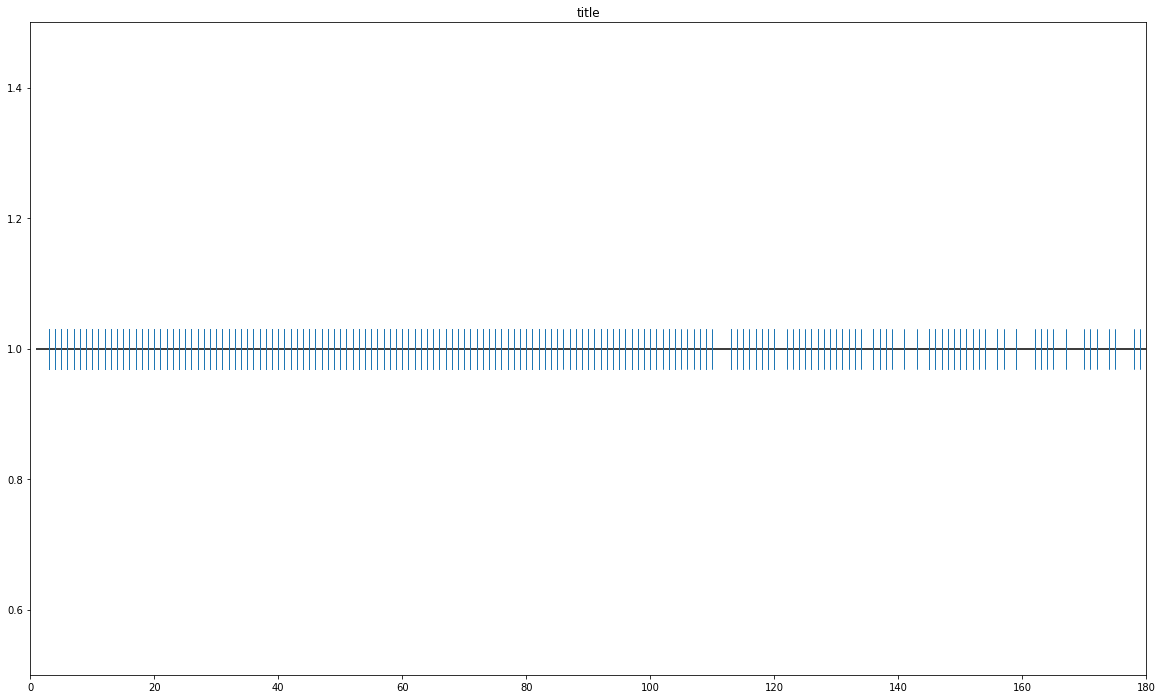

In [22]:
plot_data_1D(time_A+time_B)

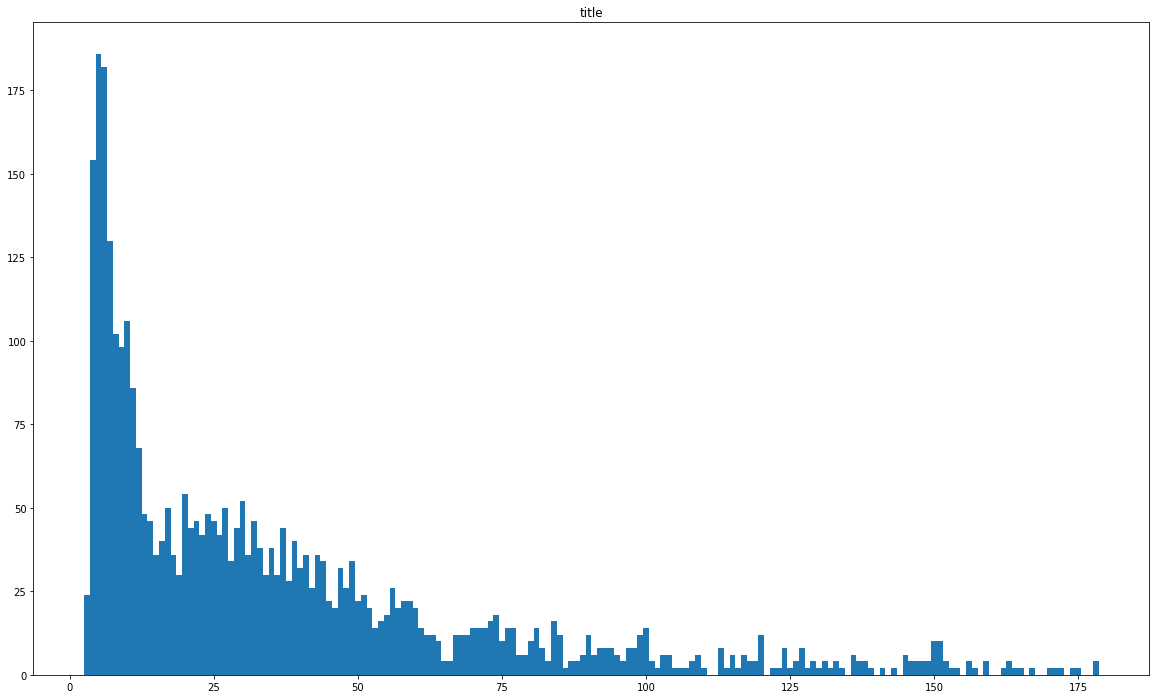

In [23]:
plotdata_frequency(time_A+time_B)

In [24]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
import pandas as pd

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H



In [25]:
X_cluster_df = pd.DataFrame(data=X_cluster.T)
hopkins(X_cluster_df)

0.9725468277516038

In [26]:
X_cluster.T.shape

(1700, 14)

In [27]:
X_cluster_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,70.0,490.0,1.0,1.0,100.000000,1.0,1.0,100.0,33.0,7.0,0.0,0.0,0.0
1,2.0,35.0,444.0,5.0,3.0,60.000000,1.0,0.0,0.0,20.0,6.0,1.0,0.0,0.0
2,4.0,72.0,680.0,13.0,3.0,23.076923,1.0,0.0,0.0,70.0,4.0,7.0,0.0,0.0
3,2.0,40.0,400.0,1.0,1.0,100.000000,0.0,0.0,0.0,11.0,12.0,0.0,0.0,0.0
4,1.0,35.0,321.0,1.0,1.0,100.000000,0.0,0.0,0.0,10.0,10.0,11.0,0.0,0.0


In [28]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X_cluster_df)
X_scaled_df = pd.DataFrame(data = X_scaled)
X_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.208882,1.232765,0.739420,-0.529048,-0.175712,0.707201,-0.467572,-0.085545,2.619757,0.807036,0.715858,-0.511300,-0.140698,-0.364113
1,-0.021098,-0.113073,0.574011,0.173045,0.412302,-0.313477,-0.467572,-0.338023,-0.509880,0.196587,0.483703,-0.312214,-0.140698,-0.364113
2,0.354469,1.309670,1.422631,1.577232,0.412302,-1.255642,-0.467572,-0.338023,-0.509880,2.544469,0.019392,0.882303,-0.140698,-0.364113
3,-0.021098,0.079190,0.415794,-0.529048,-0.175712,0.707201,-0.605356,-0.338023,-0.509880,-0.226032,1.876635,-0.511300,-0.140698,-0.364113
4,-0.208882,-0.113073,0.131722,-0.529048,-0.175712,0.707201,-0.605356,-0.338023,-0.509880,-0.272990,1.412325,1.678647,-0.140698,-0.364113


In [29]:
X_scaled_df.shape

(1700, 14)

In [30]:
hopkins(X_scaled_df)

0.9670071411442658

In [31]:
y_cluster_df = pd.DataFrame(data=y_cluster,columns=['Target'])
y_cluster_df.head()

,Target
0,Lower
1,Lower
2,Lower
3,Lower
4,Upper


In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,1.155448,-0.204430
1,-0.002503,0.559104
2,2.550060,1.334326
3,-0.276402,1.020451
4,0.198255,1.265062


In [33]:
finalDf = pd.concat([principalDf, y_cluster_df], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Target
0,1.155448,-0.204430,Lower
1,-0.002503,0.559104,Lower
2,2.550060,1.334326,Lower
3,-0.276402,1.020451,Lower
4,0.198255,1.265062,Upper


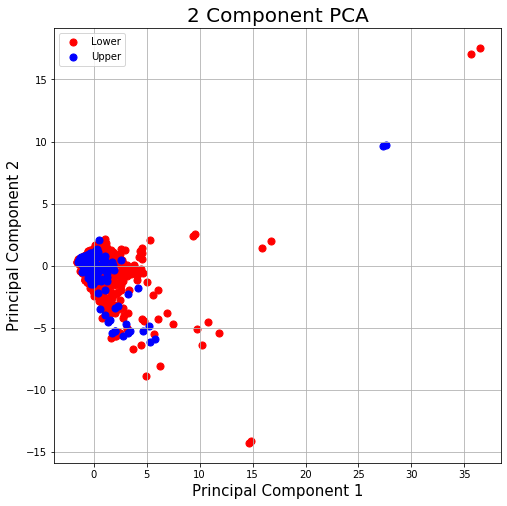

In [34]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Lower','Upper']
colors = ['r','b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [35]:
cluster_df = pd.concat([X_cluster_df, y_cluster_df], axis = 1)
cluster_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Target
0,1.0,70.0,490.0,1.0,1.0,100.000000,1.0,1.0,100.0,33.0,7.0,0.0,0.0,0.0,Lower
1,2.0,35.0,444.0,5.0,3.0,60.000000,1.0,0.0,0.0,20.0,6.0,1.0,0.0,0.0,Lower
2,4.0,72.0,680.0,13.0,3.0,23.076923,1.0,0.0,0.0,70.0,4.0,7.0,0.0,0.0,Lower
3,2.0,40.0,400.0,1.0,1.0,100.000000,0.0,0.0,0.0,11.0,12.0,0.0,0.0,0.0,Lower
4,1.0,35.0,321.0,1.0,1.0,100.000000,0.0,0.0,0.0,10.0,10.0,11.0,0.0,0.0,Upper


In [36]:
cluster_df.to_csv('out.csv',index=False)

In [37]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,max_iter=600)
kmeans.fit(X_scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
cl = []
c1_l = []
c0 = 0
c1 = 0

# print(X_scaled_df.head())
# X_scaled_df.iloc[[0]]

# predict_me = np.array(X_scaled_df.iloc[[0]].astype(float))
# # predict_me = predict_me.reshape(-1, len(predict_me))
# print(predict_me.shape)
# print(kmeans.predict(predict_me))

for i in range(len(X_scaled_df)):
    predict_me = np.array(X_scaled_df.iloc[[i]].astype(float))
    prediction = kmeans.predict(predict_me)
    if prediction == 0:
        c0 += 1
    else:
        c1_l.append(i)
        c1 += 1
    cl.append(prediction)
print(c0,c1)

1696 4


In [39]:
c1_l

[589, 762, 955, 1594]

In [40]:
for x in c1_l:
    print(X_cluster_df.iloc[[x]])

        0      1       2    3    4      5    6    7          8      9    10  \
589  83.0  485.0  5622.0  1.0  1.0  100.0  3.0  1.0  33.333333  473.0  18.0   

       11   12   13  
589  80.0  0.0  0.0  
        0      1       2    3    4      5    6    7          8      9    10  \
762  83.0  493.0  5699.0  1.0  1.0  100.0  3.0  1.0  33.333333  492.0  19.0   

       11   12   13  
762  84.0  0.0  0.0  
         0      1       2    3    4      5     6     7      8      9   10  \
955  108.0  365.0  4331.0  1.0  1.0  100.0  10.0  10.0  100.0  150.0  2.0   

       11   12   13  
955  67.0  0.0  0.0  
          0      1       2    3    4      5     6     7      8      9   10  \
1594  108.0  359.0  4292.0  1.0  1.0  100.0  10.0  10.0  100.0  142.0  4.0   

        11   12   13  
1594  67.0  0.0  0.0  


In [41]:
features = "function_count,nloc,token_count,library_count,used_library,used_library_per,macro_count,used_macro,used_macro_per,mat_op,logical_op,bit_op,pragma,fastio"
features = features.split(',')
print(features)

['function_count', 'nloc', 'token_count', 'library_count', 'used_library', 'used_library_per', 'macro_count', 'used_macro', 'used_macro_per', 'mat_op', 'logical_op', 'bit_op', 'pragma', 'fastio']


In [49]:
Sum_of_squared_distances = []
K = range(1,150)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled_df)
    Sum_of_squared_distances.append(km.inertia_)

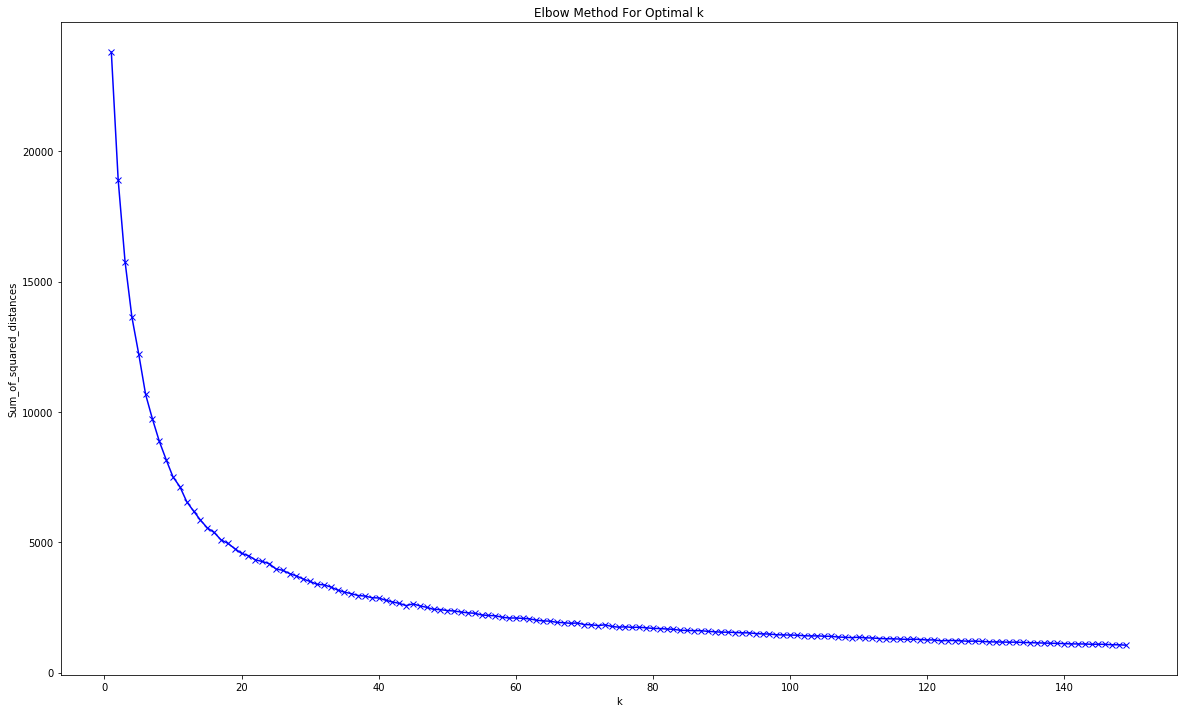

In [50]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [48]:
from pyclustertend import hopkins

hopkins(X_scaled_df, int(0.1*len(X_scaled_df)))

0.03621661966938586

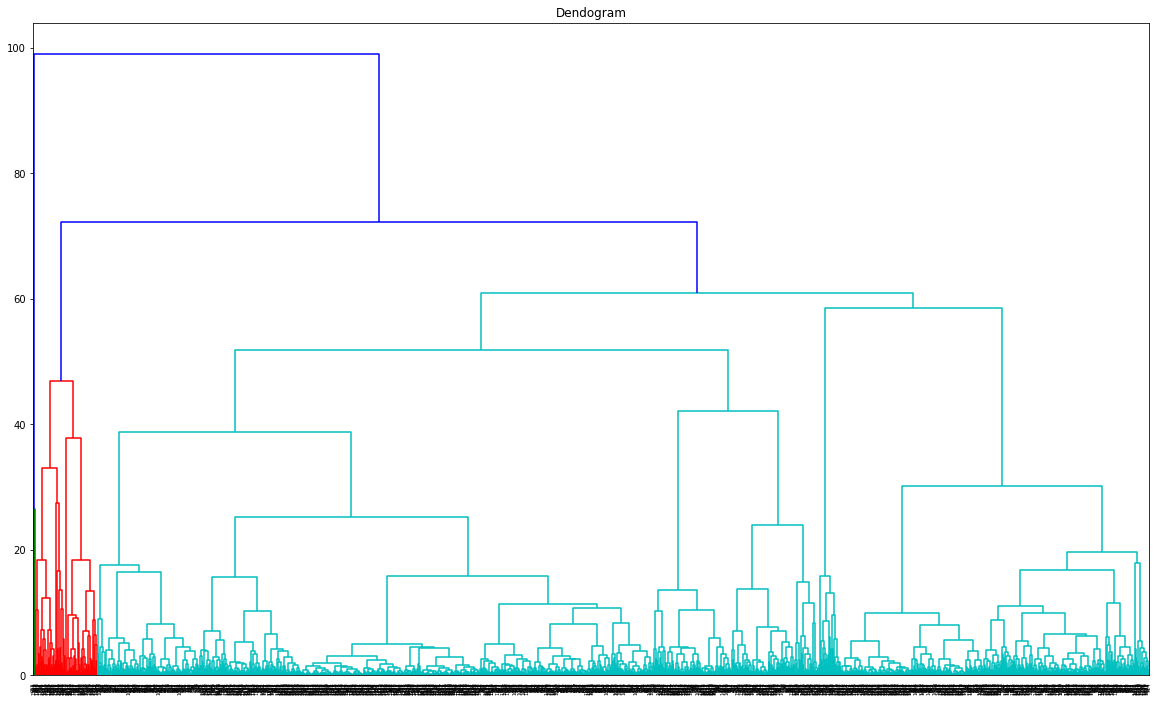

In [42]:
import scipy.cluster.hierarchy as shc

plt.figure()  
plt.title("Dendogram")  
dend = shc.dendrogram(shc.linkage(X_scaled_df, method='ward'))  

In [56]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
agg_pred = cluster.fit_predict(X_scaled_df)

In [57]:
y = np.bincount(agg_pred)
ii = np.nonzero(y)[0]
np.vstack((ii,y[ii])).T

array([[   0, 1696],
       [   1,    4]], dtype=int64)

In [75]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
print(dbscan)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)


In [76]:
dbscan.fit(X_scaled_df)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [77]:
labeled_clusters = dbscan.labels_

In [78]:
np.max(labeled_clusters),np.min(labeled_clusters)

(11, -1)

In [79]:
unique_elements, counts_elements = np.unique(labeled_clusters, return_counts=True)
np.asarray((unique_elements,counts_elements))

array([[ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [983, 468,  17, 144,   6,  14,   6,  25,   6,   5,  15,   5,   6]],
      dtype=int64)

In [83]:
X_scaled_df.columns = features
X_scaled_df.head()

,function_count,nloc,token_count,library_count,used_library,used_library_per,macro_count,used_macro,used_macro_per,mat_op,logical_op,bit_op,pragma,fastio
0,-0.208882,1.232765,0.739420,-0.529048,-0.175712,0.707201,-0.467572,-0.085545,2.619757,0.807036,0.715858,-0.511300,-0.140698,-0.364113
1,-0.021098,-0.113073,0.574011,0.173045,0.412302,-0.313477,-0.467572,-0.338023,-0.509880,0.196587,0.483703,-0.312214,-0.140698,-0.364113
2,0.354469,1.309670,1.422631,1.577232,0.412302,-1.255642,-0.467572,-0.338023,-0.509880,2.544469,0.019392,0.882303,-0.140698,-0.364113
3,-0.021098,0.079190,0.415794,-0.529048,-0.175712,0.707201,-0.605356,-0.338023,-0.509880,-0.226032,1.876635,-0.511300,-0.140698,-0.364113
4,-0.208882,-0.113073,0.131722,-0.529048,-0.175712,0.707201,-0.605356,-0.338023,-0.509880,-0.272990,1.412325,1.678647,-0.140698,-0.364113


In [85]:
X_scaled_df.describe()

,function_count,nloc,token_count,library_count,used_library,used_library_per,macro_count,used_macro,used_macro_per,mat_op,logical_op,bit_op,pragma,fastio
count,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03
mean,-2.138812e-17,-3.346996e-17,-4.545384e-17,1.512516e-16,-4.179990e-16,-6.726645e-17,4.500975e-16,-1.124656e-15,-7.007467e-17,-1.937013e-16,1.876408e-15,2.357591e-16,3.205279e-16,-1.632028e-16
std,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00
min,-2.088818e-01,-1.035934e+00,-6.593641e-01,-7.045715e-01,-4.697195e-01,-1.844495e+00,-6.053558e-01,-3.380226e-01,-5.098802e-01,-6.486508e-01,-9.092300e-01,-5.113000e-01,-1.406984e-01,-3.641130e-01
25%,-2.088818e-01,-4.591457e-01,-3.465254e-01,-5.290481e-01,-1.757124e-01,-9.939296e-01,-6.053558e-01,-3.380226e-01,-5.098802e-01,-3.669049e-01,-6.770746e-01,-5.113000e-01,-1.406984e-01,-3.641130e-01
50%,-2.088818e-01,-1.899781e-01,-1.595414e-01,-5.290481e-01,-1.757124e-01,7.072012e-01,-4.675723e-01,-3.380226e-01,-5.098802e-01,-1.790744e-01,-4.449191e-01,-3.122139e-01,-1.406984e-01,-3.641130e-01
75%,-2.109805e-02,1.945471e-01,9.576375e-02,1.730454e-01,-1.757124e-01,7.072012e-01,3.591286e-01,-8.554527e-02,-6.278925e-02,1.496292e-01,2.515473e-01,2.850445e-01,-1.406984e-01,-3.641130e-01
max,1.988398e+01,1.749818e+01,1.947019e+01,9.651307e+00,1.658269e+01,7.072012e-01,5.594901e+00,1.077098e+01,2.619757e+00,2.236060e+01,1.023423e+01,1.621193e+01,7.107401e+00,2.746400e+00
